## template spectrum from Hirano-san

Due to the low SNR of TOI-5671's spectra, I opted not to deconvolve each spectrum
for the spectrograph's IP, but the pipeline removed the telluric features from each
and combined multiple frames after aligning spectra into the reference wavelength
(the barycentric velocities of Earth for the multiple spectra were not small compared
to the spectral resolution, so we can't ignore the Doppler-shifts of individual spectra).

In [30]:
# $1: wavelength [nm]
# $2: normalized flux
import pandas as pd

df = pd.read_csv('../rv/TOI5671_nodeconv_coadded.dat', delim_whitespace=True, names=['wav','flux'])
df

,wav,flux
0,965.464052,0.329048
1,965.467975,0.690112
2,965.471897,0.691174
3,965.475820,0.706606
4,965.479743,0.706652
...,...,...
129684,1743.399200,0.720217
129685,1743.406440,0.665002
129686,1743.413680,0.660956
129687,1743.420920,0.627513


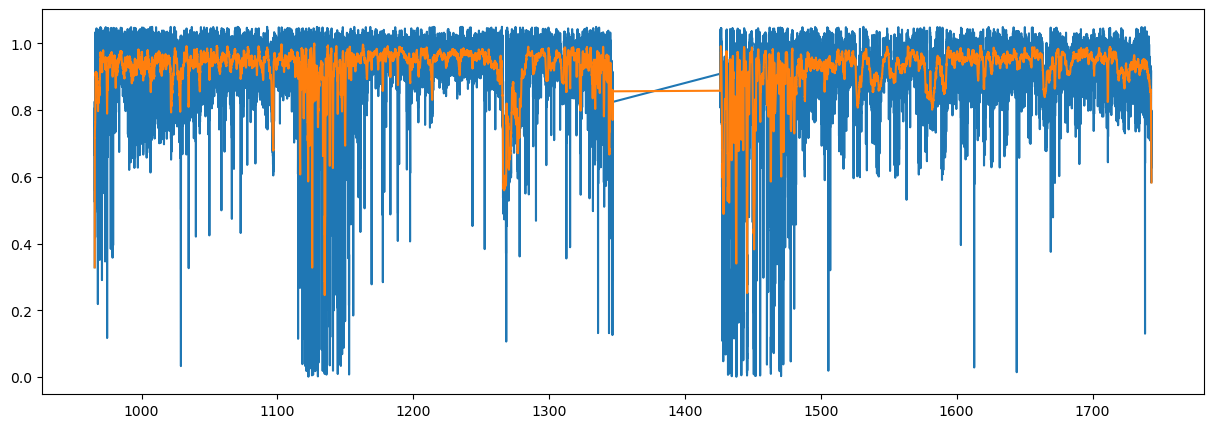

In [31]:
from scipy.signal import medfilt
import matplotlib.pyplot as pl
pl.figure(figsize=(15,5))
pl.plot(df.wav, df.flux)
pl.plot(df.wav, medfilt(df.flux, kernel_size=101))

## Template

(940.0, 950.0)

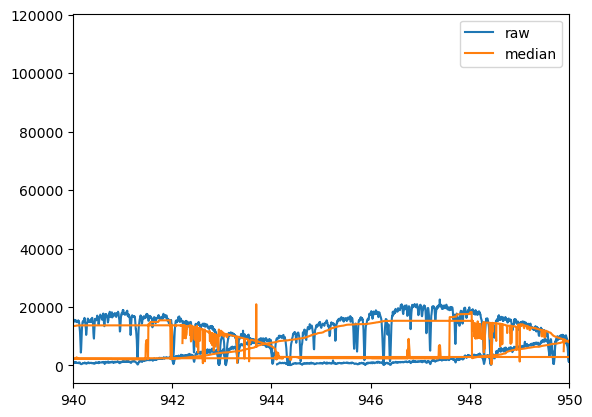

In [16]:
import pandas as pd

ref = pd.read_csv('../ccf/GJ699_join.spec', delim_whitespace=True, comment='#', names=['wav','raw','flat'])
pl.plot(ref.wav, ref.raw, label='raw')
pl.plot(ref.wav, medfilt(ref.raw, kernel_size=1001), label='median')
pl.legend()
pl.xlim(940,950)
# pl.ylim(1e4,0.2e6)

In [17]:
ref = pd.read_csv('../ccf/TOI1634_cut.spec', delim_whitespace=True, comment='#', names=['wav','order','flux'])
ref.head()

,wav,order,flux
0,926.201207,1.0,0.0
1,926.209399,1.0,0.0
2,926.217589,1.0,0.0
3,926.225777,1.0,0.0
4,926.233963,1.0,0.0


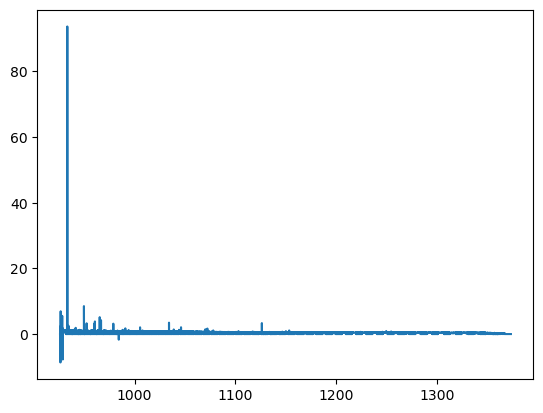

In [68]:
pl.plot(ref.wav, ref.flux)

## CCF

In [3]:
ird_gain = 2.8 #e-/ADU

In [12]:
import pandas as pd

df = pd.read_csv('../ccf/TOI5671_vhelio_refrv_202308.dat', 
                    names=['frameID','time','vel_bcorr','_1','_2','_3','airmass'],
                    delim_whitespace=True
                   )
df

,frameID,time,vel_bcorr,_1,_2,_3,airmass
0,65752,2.460042e+06,-1.746300,-0.08695,-0.08037,-0.08561,1.601
1,65754,2.460042e+06,-1.784082,-0.08595,-0.07796,-0.08487,1.424
2,65772,2.460042e+06,-2.315923,-0.08287,-0.07507,-0.08155,1.224
3,65774,2.460042e+06,-2.357167,-0.08081,-0.07120,-0.08121,1.323
4,65776,2.460042e+06,-2.393957,-0.08331,-0.07106,-0.08133,1.461
5,65922,2.460043e+06,-2.287135,-0.07306,-0.06786,-0.07258,1.116
6,66834,2.460074e+06,-11.911655,-0.04487,-0.03945,-0.04519,1.239
7,66892,2.460075e+06,-12.222248,-0.02872,-0.02499,-0.02916,1.168
8,66894,2.460075e+06,-12.270654,-0.02831,-0.02509,-0.02905,1.114
9,67034,2.460076e+06,-12.496673,-0.01526,-0.01240,-0.01571,1.155


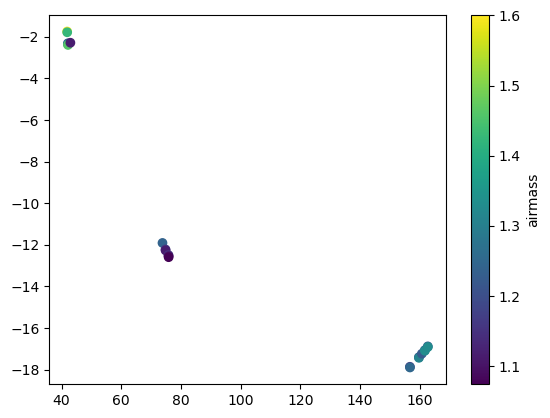

In [22]:
import matplotlib.pyplot as pl

pl.scatter(df.time-2460000, df.vel_bcorr, c=df.airmass)
pl.colorbar(label='airmass')

In [40]:
from pathlib import Path
import numpy as np

path = Path('../ccf')
p_files = np.array(list(path.glob('p*_m2.dat')))     #original spectrum in ADU
nfp_files = np.array(list(path.glob('nfp*_m2.dat'))) #relative flux spectrum normalized by the blaze function (unit arbitrary)
len(p_files), len(nfp_files)

(21, 21)

In [69]:
import pandas as pd

feh_lines = pd.read_fwf('../ccf/feh_line_list.txt', delim_whitespace=True, widths=[8], names=['wav']).squeeze()
feh_lines

0      990.0489
1      990.4987
2      990.5869
3      991.1999
4      991.4706
5      991.6441
6      992.4870
7      992.8899
8      993.3279
9      993.5206
10     993.5985
11     994.1592
12     994.4518
13     994.5785
14     994.7128
15     995.0866
16     995.3064
17     995.6641
18     995.7314
19     996.2861
20     996.5166
21     997.0814
22     997.3037
23     997.3805
24     997.4475
25     999.4838
26    1000.3440
27    1001.9530
28    1003.3060
29    1004.3970
30    1005.2320
31    1005.5340
32    1005.7510
33    1005.8290
34    1006.1630
35    1006.5960
36    1007.1900
37    1009.4640
38    1009.5940
39    1009.9350
40    1009.9620
41    1010.7970
42    1011.0850
43    1011.5000
44    1011.7960
45    1011.9700
46    1012.0330
Name: wav, dtype: float64

In [84]:
from aesthetic.plot import set_style

set_style("science")

Text(0, 0.5, 'Normalized Flux')

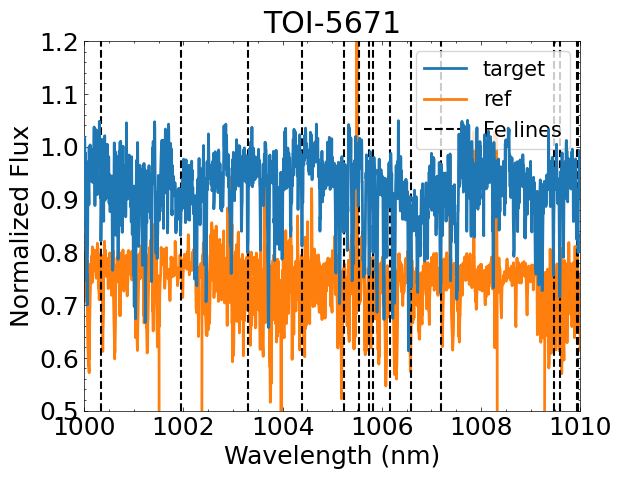

In [92]:
pl.rcParams['font.size'] = 18

pl.plot(df.wav, df.flux, label='target', lw=2, zorder=10)
pl.plot(ref.wav, ref.flux, label='ref', lw=2)
# pl.plot(ref.wav, medfilt(ref.flux, kernel_size=1001), label='median')
for n,i in enumerate(feh_lines):
    label='Fe lines' if n==0 else '_nolegend_'
    pl.axvline(i, 0, 1, ls='--', c='k', label=label, lw=1.5)
# pl.xlim(990, 1010)
pl.xlim(1000, 1010)
pl.ylim(0.5,1.2)
pl.title("TOI-5671")
pl.legend(fontsize='small')
pl.xlabel("Wavelength (nm)")
pl.ylabel("Normalized Flux")

In [75]:
feh_lines[lines]

1     990.4987
3     991.1999
6     992.4870
9     993.5206
12    994.4518
Name: wav, dtype: float64

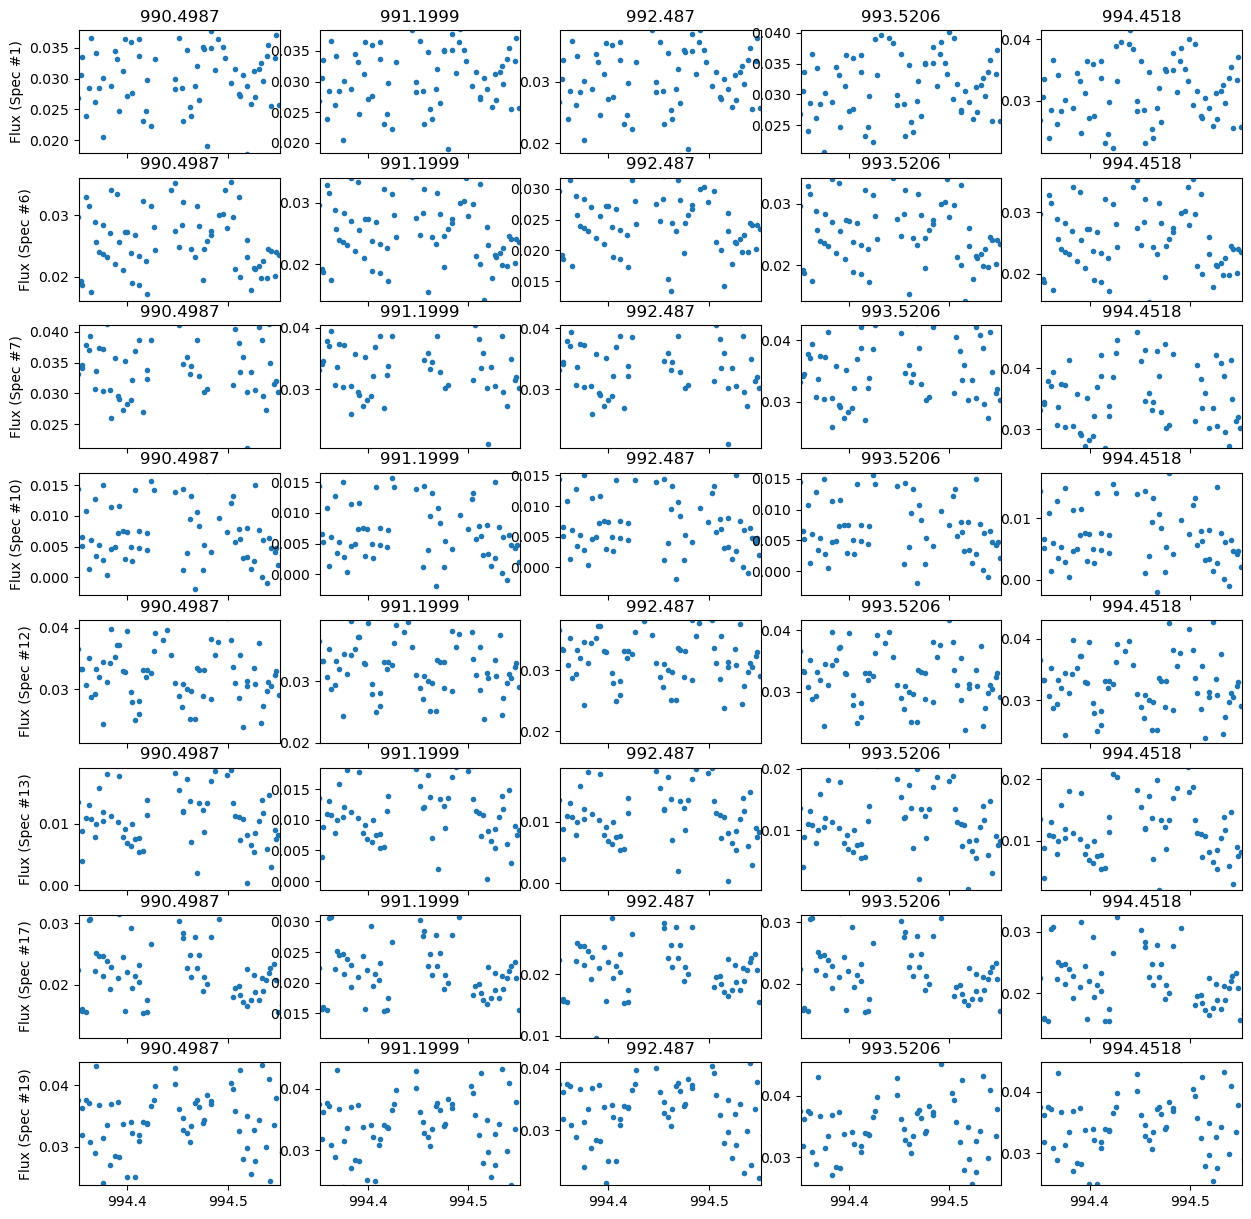

In [77]:
good_spectra = [1, 6, 7, 10, 12, 13, 17, 19]

lines = [1,3,6,9,12]
width = 0.1 #nm
fig, axs = pl.subplots(len(good_spectra), nlines, figsize=(15,15), sharex=True)
for i,f in enumerate(nfp_files[good_spectra]):
    d = pd.read_csv(f, names=['wav','order','flux'], 
                    delim_whitespace=True)
    #print(d.head())
    for j,line in enumerate(feh_lines[lines]):
        axs[i,j].plot(d.wav, d.flux, '.')
        if j==0:
            axs[i,j].set_ylabel(f"Flux (Spec #{good_spectra[i]})")

        w1 = line-width
        w2 = line+width
        axs[i,j].set_xlim(w1, w2)
        idx = (d.wav>w1) & (d.wav<w2)
        m = np.median(d.flux[idx])
        axs[i,j].set_ylim(m-0.01, m+0.01)
        axs[i,j].set_title(line)